<div style="background:red"><h2>Concept</h2></div>
<h3>Notes taken from Shaum's differential geometry, to be expanded</h3>

A vector function <br>
$$\mathbf r= \mathbf r(t),\qquad\qquad t\epsilon  \mathbf I$$
    
Is a regular parametric representation. The variable $t$ is defined on the interval $\mathbf I$. The interval has the following properties <br>
    
i)$\quad \mathbf r(t)$ is of class $C^1$ in $\mathbf I$ <br>
ii)$\quad \mathbf r'(t)\neq 0$ for all $t$ in $\mathbf I$ <br>
<br>

If a basis is chosen in $E^3$, or 3 dimensional Euclidean space, then <br>
$$r_1=r_1(t)\qquad r_2=r_2(t)\qquad r_3=r_3(t)$$
    
are the components of the curve with respect to the basis. Each scalar equation must satisfy the above properties but at least one $r_i'(t)\neq 0$.<br>

<div style="background:red">Example</div>
    The curve $\mathbf r(t)=r\cos(t)\mathbf e_1 + r\sin(t) \mathbf e_2$ for $-\infty < 0 < \infty$ is a regular parametric representation of a circle because the function is differentiable and
    defined on the interval for the basis.

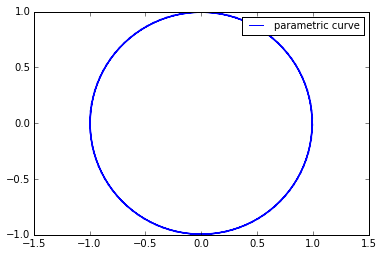

In [1]:
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca()
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
r =  1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, label='parametric curve')
ax.legend()
plt.axes().set_aspect('equal', 'datalim')

<div style="background:red">Theorem</div>
   if $\mathbf r= \mathbf r(t)$ is a regular parametric representation on $\mathbf I$ then for each $t_0$ in $\mathbf I$ there exists a neighbourhood of $t_0$ in which $\mathbf r(t)$ is one to one.<br>
   <br>
   This means that for each $t$ there is a unique point given by the curve. In the example of the circle, the function is one to many, or infinitely many multiples of the same point, this can be fixed by setting the interval to be between $0 < t < 2\pi$ to ensure that the curve only cyles once for all given values of $t$. <br>

 <div style="background:red">Change of Parameter</div>
 For a curve $\mathbf r=\mathbf r(\theta)$ on the interval $\mathbf I$ the real valued function $\theta=\theta(t)$ on the interval $\mathbf I_{t}$ is an allowable change of parameter if<br>
 $i) \quad \theta=\theta(t)$ is of class $C^1$ in $\mathbf I_{t}$. <br>
 $ii) \quad d\theta/d t \neq 0$ for all $t$ in $\mathbf I_{t}$ <br>
 <br>
 If $\theta=\theta(t)$ is an allowable change of parameter then $d\theta/dt$ is continuous and not equal to zero so is either greater than zero (smooth increasing) or less than zero (smooth decreasing).  
 <br>

 <div style="background:red">Theorem</div>
 If $\theta=\theta(t)$ is an allowable change of parameter for a function $\mathbf r=\mathbf r(\theta)$ then <br>
 $i) \quad\theta=\theta(t)$ is a one to one mapping of $\mathbf I_{t}$ onto an interval $\mathbf I_{\theta}=\theta(\mathbf I_t)$<br>
 $ii)\quad$ The inverse function $t=t(\theta)$ is an allowable change of parameter on $\mathbf I_{\theta}$.

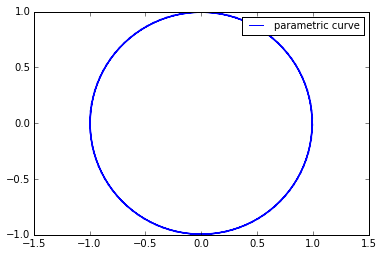

In [2]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca()
t = np.linspace(-4, 4, 100)
r =  1
theta = np.pi*t
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, label='parametric curve')
ax.legend()
plt.axes().set_aspect('equal', 'datalim')

 <div style="background:red">Defintion</div>
 A regular parametric representation $\mathbf r=\mathbf r(\theta)$ for $\theta \epsilon \mathbf I_{\theta}$ is equivalent to a regular parametric representation $\mathbf r=\mathbf {\bar r}(t)$ for $t \epsilon \mathbf I_t$ if there exists an allowable change of parameter $\theta=\theta(t)$ on $\mathbf I_t$  such that <br>
 $$
 i)\quad \theta(\mathbf I_{t}) = \mathbf I_{\theta} \qquad ii)\quad \mathbf r(\theta(t))=\mathbf{\bar r}(t)
 $$
 <br>
 This defines an equivalence relation on a set of regular representations. A regular curve can be defined as an equivalence class of regular parameteric representations. <br>
 Since a curve  $\mathbf r=\mathbf r(\theta)$ uniquely determines a curve $C$ and all representations related to it by an allowable change of parameter, any properties of the  $\mathbf r=\mathbf r(\theta)$ may not neccessarily be a property of the curve and may be properties of the parameter. Any properties of the curve must be independant of the parameter.<br>

<div style="background:red">Definition</div>
   <br>
   A regular curve  $\mathbf r = \mathbf r(t)$ on $t\epsilon \mathbf I $ is said to be simple if there are no multiple points and $t_1\neq t_2$ implies $\mathbf r(t_1)\neq \mathbf r(t_2)$. This is a property of the curve and not of the representation.
   If the interval $a\leq t\leq b$ is assigned then the curve $\mathbf r=\mathbf r(t)$ is called a regular arc and the points $\mathbf r(a)$ and $\mathbf r(b)$ are called the end points of the arc. An arc segment $\mathbf b = \mathbf r(t)$ for $a\leq t\leq b$ is the result of defining the interval $(a,b)$ of the arc as a subset of the interval of the curve $\mathbf I$ <br>
   A regular oriented curve is a curve along which a specific direction is chosen for an increase in the parameter. This can change for allowable reparameterizations because sometimes the derivative of the parameter with respect to its parameter is negative rather than positive, signifying a change in direction. 

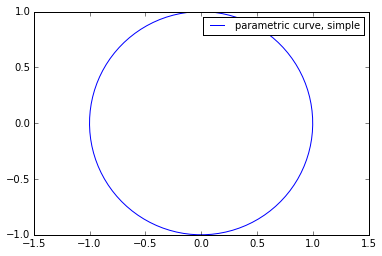

In [3]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca()
theta = np.linspace(0, 2 * np.pi, 100)
r =  1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, label='parametric curve, simple')
ax.legend()
plt.axes().set_aspect('equal', 'datalim')

<div style="background:red">Orthogonal projections</div>
    To project a curve onto a coordinate plane defined by the basis constitutes an orthogonal projection. This is achieved by setting the non-related component to zero ... i.e. <br>
    $$
    r_1=r_1(t)\qquad r_2=r_2(t)\qquad r_3=r_3(t)
    $$
    and to project onto the $\mathbf e_1 \mathbf e_2$ plane the parameter $r_3$ is set equal to zero. And likewise for the other planes.

C:\Users\dave\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


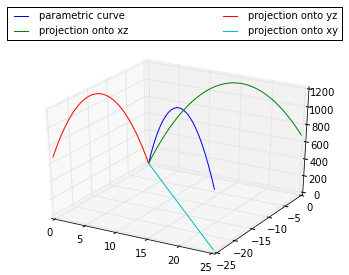

In [2]:
from matplotlib import cm
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
t = np.linspace(0, 25, 100)

# initial velocity
ux = 1
uy = -1
uz = 150

# acceleration due to gravity
a = -9.81

# x and y are initial velocity times time
x = ux*t
y = uy*t

# now the parabola
z = uz * t +0.5*a*t**2  

ax.plot(x, y, z, label='parametric curve')
y = 0 * t
ax.plot(x, y, z, label='projection onto xz')
y = uy * t
x = 0*t
ax.plot(x, y, z, label='projection onto yz')
x= ux * t
z =0 * t
ax.plot(x, y, z, label='projection onto xy')
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
#ax.legend()

<div style="background:red">Implicit representations of Curves</div>
    A curve may be represented implicitly as the intersection of two surfaces, or as the locus of points $x_1,\ x_2,\ x_3$ satisfying the relations <br>
    $$
    F_1(x_1,x_2,x_3)=0\qquad \qquad F_2(x_1,x_2,x_3)=0
    $$
    These equations can be solved if <br>
    $$
    \left |\begin{array}{ccc} \frac{\partial F_1}{\partial x_1} &  \frac{\partial F_1}{\partial x_2} \\  \frac{\partial F_2}{\partial x_1} &  \frac{\partial F_2}{\partial x_2} \end{array}\right|
    $$
    Then the curve can be represented as $x_1=x_1(x_3)$, $x_2=x_2(x_3)$. requires example.

### Arc Length
   
An arc length can be defined in terms of approximating vectors created by subdividing the interval into discrete subdivisions and evaluating the vector function at those points, creating an approximating polygonal arc. The approximate arc length is considered to be the sum of all these vectors and the arc length of the curve is the greatest of lengths of all possible approximating polygonal arcs. An arc $\mathbf r=\mathbf r(t)$ is said to have an approximating polygonal arc $S$ with an interval subdivision $\delta t$ and the arc is said to be rectifiable if the set of all $S$ is bounded from above, or has a supremum which is defined to be the length of the arc. This can be found using limits. 
   
A regular arc $\mathbf r=\mathbf r(t)$ on the interval $a \leq t \leq b$ is rectifiable and the length is given by the integral
   
$$
s = \displaystyle \int_a^b \left | \frac{d\mathbf r}{dt}\right | dt = \int_a^b \sqrt { \left(\frac{dx_1}{dt}\right)^2 +\left(\frac{dx_2}{dt}\right)^2+\left(\frac{dx_3}{dt}\right)^2}dt 
$$


In [16]:
from sympy import *
from sympy.vector import *
from __future__ import division

x,t = symbols('x t')

## define integral for parabola plotted above

ux,uy,uz,t = symbols('ux uy uz t')

## DO NOT use N for coordinate system 
## because N() is a function for printing numerical values
e = CoordSysCartesian('e')
x1 = ux*t
x2 = uy*t
a = S(-9.81)
x3 = uz*t + 0.5*(a*t**S(2)) 

r = x1*e.i + x2*e.j + x3 *e.k
rr = e.i - e.j +(150-9.81*t)*e.k
print r
dr = diff(r.subs({ux:S(1),uy:S(-1),uz:S(150)}),t)
print dr
print dr.magnitude()
print "Result of symbolic integration = "
print integrate(expand(dr.magnitude().doit()).doit() ,(t,0,25)).doit()



def numerical_integrate(expr,t1,t2, max_num):
    dt = S(t2-t1)/max_num
    mag = 0
    for i in range(0,max_num):
        expr1 = expr.subs({t:dt*i})
        expr2 = expr.subs({t:dt*(i+1)})
        expr3 = (expr2 - expr1).magnitude()                    
        mag += expr3
                        
    return mag

print "Result of numeric integration = "
print numerical_integrate(r.subs({ux:1, uy:-1, uz:150}),0,25,1000)
##quad(lambda tt: exp.subs({t:tt}), [0, 25])

t*ux*e.i + t*uy*e.j + (-4.905*t**2 + t*uz)*e.k
e.i + (-1)*e.j + (-9.81*t + 150)*e.k
sqrt((-9.81*t + 150)**2 + 2)
Result of symbolic integration = 
1.0*Integral(sqrt(96.2361*t**2 - 2943.0*t + 22502.0), (t, 0, 25))
Result of numeric integration = 
1610.35031235926


$$\left|\frac{d \mathbf r}{d t}\right| = \sqrt{\left(\frac{d r_1}{dx}\right)^2+\left(\frac{dr_2}{dy}\right)^2+\left(\frac{dr_3}{dz}\right)^2 }$$

Here 
   
$$\mathbf r = u_x t \mathbf i + u_y t \mathbf j +\left( \frac{-9.81 t^2}{2} + u_z t\right)\mathbf k$$
   
and

$$\frac{d \mathbf r}{dt} = u_x \mathbf i + u_y \mathbf j + (-9.81 t + u_z) \mathbf k $$

so the magnitude is 

$$\left|\frac{d \mathbf r}{d t}\right| = \sqrt{u_x^2+u_y^2+(-9.81 t + u_z)^2 }$$

To integrate this I need to change variables.

I will use G ... 
and $G = -9.81 t + u_x$
   
and $ dG/dt = -9.81$ and $dt = -dG/9.81$ 

$$ -\frac{1}{9.81}\int_{S_{G_0}}^{S_{G_1}}  \sqrt{u_x^2+u_y^2+G^2 } dG $$

but the limits have changed, from above, G takes the real interval $t\to -9.81t + u_z$, so the limits are $S_{G_1}=-9.81 \times 25 + u_z$, and $S_{G_0}=-9.81 \times (0) + u_z = u_z$,

This integral is a well known integration from a lookup table 

$$\int \sqrt{x^2 + a^2}\ dx = \frac{a^2}{2}\sinh^{-1}\left(\frac{x}{a}\right) + \frac{x}{2} \sqrt{x^2 + a^2} + C $$ 

So clearly $(x^2 + a^2)$ in  this case can be substituted with $a^2 = u_x^2 + u_y^2$ and $x = G$,  

$$-\frac{1}{9.81}\int_{S_{G_0}}^{S_{G_1}}  \sqrt{u_x^2+u_y^2+G^2 } dG = -\frac{1}{9.81}\left(\frac{u_x^2 + u_y^2}{2}\sinh^{-1}\left(\frac{G}{\sqrt{u_x^2 + u_y^2}}\right) + \frac{G}{2} \sqrt{u_x^2 + u_y^2 + G^2} + C \bigg\rvert_{S_{G_0}}^{S_{G_1}} \right) $$ 

I really don't how this was first solved ... the function $\sinh^{-1} (x) = \log ({x + \sqrt{x^2 + 1}}) $, at least approximately depending on how the machine does log ... so 

$$ s   = -\frac{1}{9.81}\left(\frac{u_x^2 + u_y^2}{2}\log\left(\frac{G}{\sqrt{u_x^2 + u_y^2}} + \sqrt{\frac{G^2}{u_x^2 + u_y^2} + 1}\right) + \frac{G}{2} \sqrt{u_x^2 + u_y^2 + G^2} + C \bigg\rvert_{S_{G_0}}^{S_{G_1}} \right)  $$

I might solve for $s$ but solving this equation for $G$ (and eventually $t$ ) will be difficult or impossible -    A different example may be more appropriate for the unit speed paramerization of the curve., since this is a curve from physics involving acceleration. 

> as a matter of fact both arcsinh() and log() have a series expansion, however there are problems with using this
   
> 1) Galois theory (see wikipedia)
   
> 2) Sympy does not seem to produce an expression for the standard quartic, although it is apparently solved.
   
> 3) The series for arcsinh() goes up to 7th degree within the first 4 terms
   
> 4) The series approximation for log() only starts to look good near the 10th degree (see below)
   


In [14]:
G = symbols('G')

lim1 = uz
lim2 = -9.81*25 + uz

sol =    -integrate( sqrt(ux**2 +uy**2 + G**2)/9.81 , (G,lim1, lim2 ))
#print sol
print "solution 1"
print N(sol.subs({ux:1,uy:-1,uz:150}))

s_expr = ((ux**2 + uy**2)/2) * asinh(G/sqrt(ux**2 + uy**2)) + (G/2) * sqrt(ux**2 + uy**2 + G**2)
sol2 = s_expr.subs({G:lim2, ux:1,uy:-1,uz:150}) - s_expr.subs({G:lim1, ux:1,uy:-1,uz:150})
print "solution 2"
print N(-sol2/9.81)

print "solution 3"
lim3 = -9.81*24 + uz
sol3 = s_expr.subs({G:lim2, ux:1,uy:-1,uz:150}) - s_expr.subs({G:lim3, ux:1,uy:-1,uz:150})
print N(-sol3/9.81)

solution 1
1610.35082325725
solution 2
1610.35082325725
solution 3
90.3560788938458


Now that we have arc length, it is interesting to try to solve for t, because then we can reparameterize the curve with arc length

In [6]:
## looking at the contents of the log  ...
(sqrt(expand((G / a + sqrt( G**2 /a**2 + 1 )) *(G / a + sqrt( G**2 /a**2 + 1 )) )).doit())

sqrt(2*G**2/a**2 + 2*G*sqrt(G**2/a**2 + 1)/a + 1)

In [7]:
simplify(G/a + sqrt( G**2 /a**2 + 1 )) == simplify(G/a +sqrt( (G**2 +a**2) /a**2 )) 

True

In [8]:
expand( ( G+sqrt( (G**2 +a**2)  ) )*( G+sqrt( (G**2 +a**2)  ) ))

2*G**2 + 2*G*sqrt(G**2 + a**2) + a**2

In [139]:
log(a/b) == log(a) - log(b) ## remembering that sympy will forget the rules of basic math.

False


$$ s   = -\frac{1}{9.81}\left(\frac{u_x^2 + u_y^2}{2}\log\left( G + \sqrt{G^2 + u_x^2 + u_y^2}\right) - \log(\sqrt(u_x^2 + u_y^2)) + \frac{G}{2} \sqrt{u_x^2 + u_y^2 + G^2} + C \bigg\rvert_{S_{G_0}}^{S_{G_1}} \right)  $$

or, setting $a = \sqrt(u_x^2 + u_y^2)$ and $ \lambda = -9.81$ and assuming the limits have already been input


$$ s   = -\frac{1}{\lambda}\left(\frac{a^2}{2}\log\left( G + \sqrt{G^2 + a^2}\right) - \log(a) + \frac{G}{2} \sqrt{ G^2 + a^2}  \right)  $$



In [20]:
t0 = symbols('t0') 
sol4 = s_expr.subs({ ux:1,uy:-1,uz:150, t:t0}) 
print s_expr

# had to redefine x here
x = symbols('x')

a,b,c,d,e = symbols('a,b,c,d,e')
# no solution to the quartic here
#solve(a*x**4 + b*x**3 + c*x**2 + d**x + e, x)

#series((-1)**(n+1)*(x-1)**n / n,5)

def series_expand(expr,n, MAX):
    ex2 = 0
    for i in range(1,MAX):
        ex2 += expr.subs({n:i})
        
    return ex2

n = symbols('n')
ex2 = series_expand((-1)**(n+1)*((x+sqrt(x**2+1))-1)**n / n, n, 4)
print "The 4th degree approximation"
print ex2.subs({x:t})

ex3 = series_expand((-1)**(n+1)*((x+sqrt(x**2+1))-1)**n / n, n, 8)
print "The 8th degree approximation"
print ex3.subs({x:t})

G*sqrt(G**2 + ux**2 + uy**2)/2 + (ux**2/2 + uy**2/2)*asinh(G/sqrt(ux**2 + uy**2))
The 4th degree approximation
t + sqrt(t**2 + 1) + (t + sqrt(t**2 + 1) - 1)**3/3 - (t + sqrt(t**2 + 1) - 1)**2/2 - 1
The 8th degree approximation
t + sqrt(t**2 + 1) + (t + sqrt(t**2 + 1) - 1)**7/7 - (t + sqrt(t**2 + 1) - 1)**6/6 + (t + sqrt(t**2 + 1) - 1)**5/5 - (t + sqrt(t**2 + 1) - 1)**4/4 + (t + sqrt(t**2 + 1) - 1)**3/3 - (t + sqrt(t**2 + 1) - 1)**2/2 - 1


In [9]:
init_printing(use_latex=true)
latex(simplify( (G / (sqrt(ux**2 + uy**2)) + sqrt(G**2/(ux**2 + uy**2)+1 ))) )

'\\frac{1}{\\sqrt{ux^{2} + uy^{2}}} \\left(G + \\sqrt{\\frac{G^{2} + ux^{2} + uy^{2}}{ux^{2} + uy^{2}}} \\sqrt{ux^{2} + uy^{2}}\\right)'

The 2th degree approximation


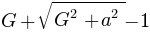

In [12]:
ex2 = series_expand((-1)**(n+1)*(x-1)**n / n, n, 2)
print "The 2th degree approximation"
ex2.subs({x:G+sqrt(G**2 + a**2)})

The 2th degree approximation


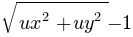

In [11]:
ex2 = series_expand((-1)**(n+1)*(x-1)**n / n, n, 2)
print "The 2th degree approximation"
ex2.subs({x:sqrt(ux**2 + uy**2)})

$$ s   = -\frac{1}{\lambda}\left(\frac{a^2}{2}\log\left( G + \sqrt{G^2 + a^2}\right) - \log(a) + \frac{G}{2} \sqrt{ G^2 + a^2}  \right)  $$

and the 2nd degree approximation is this

$$ s   = -\frac{1}{\lambda}\left(\frac{a^2}{2}\left( G + \sqrt{G^2 + a^2} -1 - a+1 \right)+ \frac{G}{2} \sqrt{ G^2 + a^2}  \right)  $$

347.021077277739
352.994773096610


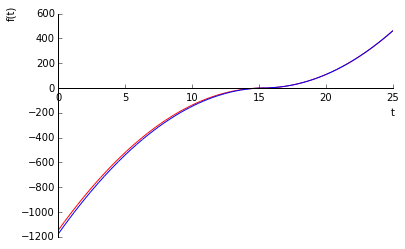

In [17]:
from sympy.plotting import plot
G = symbols('G')
TG = -9.81 * t + uz
TG2 = TG.subs({t:5})
TG1 = TG.subs({t:2})
#s_expr = s_expr.subs({ux:1,uy:-1,uz:150})
#print s_expr.subs({G:-9.81 * t + uz,ux:1,uy:-1,uz:150})
print -N(s_expr.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81

s_expr2 = ((ux**2 + uy**2)/2) * (G+sqrt(G**2 + ux**2 + uy**2) - 1) - ((ux**2 + uy**2)/2) *(sqrt(ux**2 + uy**2)+1) + (G/2)*sqrt(G**2 + ux**2 + uy**2)
print -N(s_expr2.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr2.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81


actual_curve = -(1/9.81)*s_expr.subs({G:-9.81 * t + uz,ux:1,uy:-1,uz:150})
approx_curve = -(1/9.81)*s_expr2.subs({G:-9.81 * t + uz,ux:1,uy:-1,uz:150})
p1 = plot(actual_curve,(t,0,25), show=false,line_color='r')
p2 = plot( approx_curve,(t,0,25), show=false)
p1.extend(p2)
p1.show()



In [18]:
TG2 = TG.subs({t:25})
TG1 = TG.subs({t:0})
#s_expr = s_expr.subs({ux:1,uy:-1,uz:150})
#print s_expr.subs({G:-9.81 * t + uz,ux:1,uy:-1,uz:150})
print -N(s_expr.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81
print -N(s_expr2.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr2.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81


1610.35082325725
1639.88556368463


The 2th degree approximation


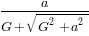

In [21]:
ex2_1 = series_expand(1 /(n* x**n), n, 2)
#ex2_1 = 1 /x
print "The 2th degree approximation"
ex2_1 = ex2_1.subs({x:(G+sqrt(G**2 + a**2))/a}).doit()
ex2_1

The 2th degree approximation


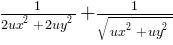

In [304]:
ex2_2 = series_expand(1 /(n* x**n), n, 3)
#ex2_2 = 1 /x
print "The 2th degree approximation"
ex2_2 = ex2_2.subs({x:sqrt(ux**2 + uy**2)}).doit()
ex2_2

a/(G + sqrt(G**2 + a**2))


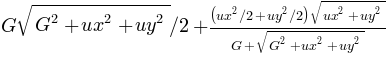

In [32]:
A = symbols('A')
s_expr_3 = ((ux**2 + uy**2)/2) * A + (G/2) * sqrt(ux**2 + uy**2 + G**2)
print ex2_1
s_expr_3 = s_expr_3.subs({A:ex2_1 }).doit()
s_expr_3 = s_expr_3.subs({a:sqrt(ux**2 + uy**2)}).doit()
s_expr_3

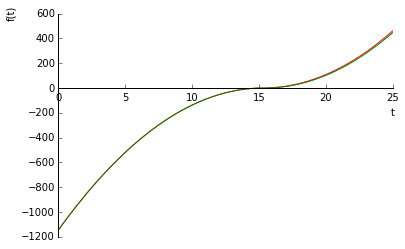

In [23]:
actual_curve = -(1/9.81)*s_expr.subs({G:-9.81 * t + uz,ux:1,uy:-1,uz:150})
#approx_curve = -(1/9.81)*s_expr2.subs({G:-9.81 * t + uz,ux:1,uy:-1,uz:150})
approx_curve2 = -(1/9.81)*s_expr_3.subs({G:-9.81 * t + uz,ux:1,uy:-1,uz:150})
p1 = plot(actual_curve,(t,0,25), show=false,line_color='r')
#p2 = plot( approx_curve,(t,0,25), show=false)
p3 = plot(approx_curve2,(t,0,25), show=false,line_color='g')
#p1.extend(p2)
p1.extend(p3)
p1.show()

In [ ]:
TG2 = TG.subs({t:25})
TG1 = TG.subs({t:15})
print -N(s_expr.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81
print -N(s_expr_3.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr_3.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81
print -N(s_expr2.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr2.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81

In [25]:
s= symbols('s')
solve(s_expr2-s,G)

KeyboardInterrupt: 

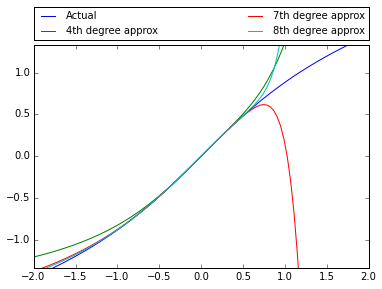

In [7]:


mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca()
t = np.linspace(-2, 2, 100)
r =  1
xx = t
# example set 
yy = np.arcsinh(t)
ax.plot(xx, yy, label='Actual')
yy = t + np.sqrt(t**2 + 1) + (t + np.sqrt(t**2 + 1) - 1)**3/3 - (t + np.sqrt(t**2 + 1) - 1)**2/2 - 1


ax.plot(xx, yy, label='4th degree approx')

yy = t + np.sqrt(t**2 + 1) - (t + np.sqrt(t**2 + 1) - 1)**6/6 + (t + np.sqrt(t**2 + 1) - 1)**5/5 - (t + np.sqrt(t**2 + 1) - 1)**4/4 + (t + np.sqrt(t**2 + 1) - 1)**3/3 - (t + np.sqrt(t**2 + 1) - 1)**2/2 - 1
ax.plot(xx, yy, label='7th degree approx')
yy = t + np.sqrt(t**2 + 1) + (t + np.sqrt(t**2 + 1) - 1)**7/7 - (t + np.sqrt(t**2 + 1) - 1)**6/6 + (t + np.sqrt(t**2 + 1) - 1)**5/5 - (t + np.sqrt(t**2 + 1) - 1)**4/4 + (t + np.sqrt(t**2 + 1) - 1)**3/3 - (t + np.sqrt(t**2 + 1) - 1)**2/2 - 1
ax.plot(xx, yy, label='8th degree approx')
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylim(-1,1)
plt.axes().set_aspect('equal', 'datalim')

In [80]:
t = symbols('t')
expr = 2*((sqrt(313.751)- (t/ 1051.958))- log(((sqrt(313.751)- log(t))- (t/ 1051.958))))- t/ 741.752
expr.subs({t:1610/25})

30.0133699983648

### Arc Length As Parameter</div>
   
$s=s(t)$ is an allowable change in parameter on $\mathbf I$ since $ds/dt = |d\mathbf r/dt| $ from the definition of the integral. This representation can travel either forwards or backwards, and is therefore not unique. The natural representation of a curve in terms of arc length is $|d\mathbf r/dt| = 1$. 

<div style="background:red">Example</div>
    For the circle $\mathbf r(\theta)=r\cos(\theta)\mathbf e_1 + r\sin(\theta)\mathbf e_2$ on the interval $0 < \theta_i < \theta $ we consider the intergral <br>
    $$
    s = \displaystyle \int_0^{\theta}  \sqrt { \left(\frac{dx_1}{d\theta}\right)^2 +\left(\frac{dx_2}{d\theta}\right)^2 } d\theta  
    $$
    evaluating
    $$
    s=\displaystyle \int_0^{\theta}  \sqrt { r^2 \cos^2(\theta) +r^2 \sin^2(\theta) } d\theta =  \int_0^{\theta}  r d\theta  = [r\theta]_0^{\theta} = r \theta 
    $$
    and so $\theta = \frac{s}{r}$  and the natural representation is  $\mathbf r(s/r)=r\cos(s/r)\mathbf e_1 + r\sin(s/r)\mathbf e_2$. This is checked easily by setting the limit $s=2\pi r$ and we find the final point in $\theta$ is $2\pi$.
    <br>

<div style="background:red"><h2>Curvature and Torsion</h2></div><br>
    A regular curve can be uniquely determined by two scalar quantities, curvature and torsion. <br>

<div style="background:red">Unit Tangent Vector</div>
    If $\mathbf r=\mathbf r(s)$ is a natural representation of a regular curve C then the tangent to the curve is <br>
    $$
    \displaystyle \mathbf{\dot r}(s) = \frac{d\mathbf r}{ds} =\lim_{\Delta s \to 0} \frac{ \mathbf r(s+\Delta s)-\mathbf r(s)}{\Delta s}
    $$
    Where the quantity $\frac{ \mathbf r(s+\Delta s)-\mathbf r(s)}{\Delta s}$ is a secant to the curve C. The vector $\mathbf {\dot r}$ is of unit length in the natural representation. If $\mathbf r=\mathbf r(\bar s)$ is any other natural representation then <br>
    $$
    \frac{d\mathbf r}{d\bar s} = \frac{d \mathbf r}{ds}\frac{ds}{d\bar s} = \pm \frac{d \mathbf r}{ds} 
    $$
    since the direction can be the same or opposite. The unit tangent vector can be denoted $\mathbf t=\mathbf t(s)=\mathbf {\dot r}(s)$. <br>

<div style="background:red">Definition</div><br>
    If $\mathbf r=\mathbf r(t)$ is an abritrary representation of C with the same orientation as $\mathbf r=\mathbf r(s)$ then <br>
    $$
    \mathbf r' = \frac{d\mathbf r}{dt} = \frac{d \mathbf r}{ds}\frac{ds}{dt} = \mathbf t \left|\frac{d \mathbf r}{dt}\right| = \mathbf t |\mathbf r'| 
    $$
    since <br>
    $$
    \frac{ds}{dt} = \left | \frac{d\mathbf r}{dt}\right| 
    $$

<div style="background:red">Tangent Line and Normal Plane</div><br>
    The straight line through a point $\mathbf r$ on a regular curve $C$ parallel to the tangent vectors at $\mathbf r$ is called a tangent line to $C$ at $\mathbf r$. <br>
    $$
    \mathbf r = \mathbf r_0 + k \mathbf t_0 \qquad\qquad -\infty < k < \infty
    $$
    Where $\mathbf t_0=\mathbf t(t_0)$ is the unit tangent of $\mathbf r$ at $t=t_0$. The plane through $\mathbf r$ orthogonal to the tangent line is called the normal plane. 

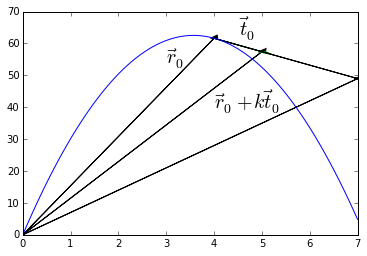

In [15]:
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.gca()
t = np.linspace(0, 7, 100)

# initial velocity
ux = 1
uy = -1
uz = 35

v = (ux**2 + uy**2 + uz**2)**(0.5)

# acceleration due to gravity
a = -9.81

# x and y are initial velocity times time
x = ux*t
y = uy*t

# now the parabola
z = v * t +0.5*a*t**2  

ax.plot(x, z, label='parabola')
t0 = 4
t1 = 6
z_t0 = v*t0 + 0.5 * a * t0**2
z_t1 = v*t1 + 0.5 * a * t1**2

# tangent T at t0
T_t0z = v + a*t0

T_t0x = 1
 

ax.arrow(0, 0, t0, z_t0, head_width=0.15, head_length=1.0, fc='k', ec='k')
ax.arrow(0, 0,t0+ 1, ( T_t0z +z_t0) , head_width=0.15, head_length=1.0, fc='k', ec='k')
ax.arrow(0, 0,t0+ 3, ( 3*T_t0z +z_t0) , head_width=0.15, head_length=1.0, fc='k', ec='k')
ax.arrow(t0, z_t0, T_t0x, ( T_t0z) , head_width=0.15, head_length=1.0, fc='g', ec='g')
ax.arrow(t0, z_t0, 3*T_t0x, 3*( T_t0z) , head_width=0.15, head_length=1.0, fc='k', ec='k')
tex = r'$  \vec r_0$'

ax.text(t0-1, z_t0-10, tex, fontsize=20, va='bottom')

tex = r'$  \vec r_0 + k\vec t_0$'

ax.text(t1-2, ( T_t0z +z_t0)-20, tex, fontsize=20, va='bottom')

tex = r'$ \vec t_0$'

ax.text(t0+0.5, ( T_t0z +z_t0)+3, tex, fontsize=20, va='bottom')

<div style="background:red">Definition of Normal Plane</div><br>
    The normal plane at $\mathbf r_0$ is <br>
    $$
    (\mathbf r-\mathbf r_0)\cdot \mathbf t_0 = 0
    $$
    introducing a second variable $\mathbf r$ we can define the tangent line as $\mathbf y = \mathbf r + k \mathbf t$ for the same range of $k$. The normal plane would then be $(\mathbf y-\mathbf r)\cdot \mathbf t = 0$. It should be noted that $\mathbf r'$ is parallel to $\mathbf t$ so <br>
    $$
    \mathbf y= \mathbf r + k \mathbf r' \qquad\qquad -\infty < k < \infty\\ \ \\
     (\mathbf y-\mathbf r_0)\cdot \mathbf r' = 0
    $$
    also define the tangent line and normal plane.

<div style="background:red">Curvature</div><br>
    Assuming that $\mathbf r= \mathbf r(s)$ is a regular curve of class $\geq 2$ then the tangent vector $\mathbf t=\mathbf t(s) = \mathbf {\dot r}(s)$ is of class $C^1$ and the derivative <br>
    $$
    \frac{d\mathbf t}{ds} = \mathbf{\dot t}(s) = \mathbf {\ddot v}(s)
    $$
    is independent of orientation of the curve.

<div style="background:red">Proof</div><br>
     Let $\mathbf r=\mathbf r(\bar s) $ be any other natural representation of the curve C with unit tangent $\mathbf {\bar t}=d\mathbf r/d\bar s$ and $s=\bar s+\epsilon$ where $\epsilon$ is an abritrary constant. Then
         $$
    \frac{d\mathbf {\bar t} }{d\bar s} = \frac{d}{d\bar s}\left(\frac{d\mathbf r}{d \bar s}\right) = \frac{d}{d\bar s}\left(\pm \frac{d\mathbf r}{d  s}\right) =  \pm \frac{d}{d s}\left(\frac{d\mathbf r}{d  s}\right)\frac{ds}{d\bar s} = (\pm 1)^2\frac{d}{ds}\left(\frac{d\mathbf r}{ds}\right) = \frac{d\mathbf t}{ds}
    $$
    Therefore $\mathbf {\dot t}$ is independant of orientation.

<div style="background:red">Definition</div><br>
    The vector $\mathbf {\dot t}(s)$ is called the curvature vector on $C$ at the point $\mathbf r(s)$ and is denoted by $\mathbf k=\mathbf k(s)=\mathbf{\dot t}(s)$.  The vector $\mathbf k$ is orthogonal to $\mathbf t$ and also parallel to the normal plane. When greater than zero it is in the direction that the curve is turning. The magnitude of the curvature vector is <br>
    $$
    |\kappa| = |\mathbf k(s)| 
    $$
    and is called the curvature of $C$ at $\mathbf r(s)$ . The reciprocal of the curvature is called the radius of curvature $\rho = \frac{1}{|\kappa|}$ . 

<div style="background:red">Definition</div><br>
    The curvature is equal to the rate of change of the direction of the tangent with respect to arc length.

<div style="background:red">Definition</div><br>
    If the curvature is zero all along a curve then the curve is a straight line. 

<div style="background:red">Definition</div><br>
    An identity to calculate the curvature is <br>
    $$
    |\kappa|=\frac{|\mathbf r'-\mathbf r''|}{|\mathbf r'|^3}
    $$

<div style="background:red">Principal Normal Vector</div><br>
    If $C$ is of class $\geq 2$ the curvature vector varies continuously along $C$ and the unit vector in the direction of $\mathbf k$ is not defined where $\mathbf k=0$ and may have discontinuities. The principle normal is defined as 
    $$
    \mathbf n = \frac{\mathbf k(s)}{|\mathbf k(s)|}
    $$
    and is defined to be continuous along $C$ when possible. From the definition of curvature <br>
    $$
    \mathbf k(s) = \kappa(s) \mathbf n(s)
    $$
    where $\mathbf n$ has the same direction as $\mathbf k$ we have $\kappa = |\mathbf k|$ and when $\mathbf n$ has the opposite direction then $\kappa = -|\mathbf k|$. At the point of inflection both $\mathbf k$ and $\kappa$ equal zero. Also the identity $\mathbf n\cdot\mathbf n=1$ can be used to multiply both sides of the equation by $\mathbf n$ to give <br>
    $$
    \kappa = \mathbf k(s)\cdot \mathbf n(s)
    $$
    <br> A curve of class $C^{\infty}$ may not have a definite principle normal at a point of inflection. If the curve is analytic then a continuous principal normal will always exist. (if it is not a straight line).

<div style="background:red">Osculating Plane</div><br>
      Analagous to the equations above the principal normal line to $C$ at $\mathbf r$ is given by <br>
      $$
      \mathbf y = \mathbf r + k\mathbf n\qquad -\infty < k < \infty 
      $$
      And the plant parallel to the unit tangent and the principal normal is <br>
      $$
      [(\mathbf y - \mathbf r)\mathbf t \mathbf n] = 0
      $$
      as given by the scalar triple product. This can also be written 
      $$
      [(\mathbf y - \mathbf r)\mathbf{ \dot r} \mathbf {\ddot r}] = 0
      $$      
      <br>
      The osculating plane at a point can be defined as the limiting position of a plane passing through three neighbouring points on a curve as the points approach the given point or as the distance between the intersection points and the given point of evaluation tends to zero. This is a definition of the order of contact with a curve.  

<div style="background:red">Binormal</div><br>
       The vector <br>
       $$
       \mathbf b(s) = \mathbf t(s) \times \mathbf n(s)
       $$
       is defined as the binormal vector to the curve, and is orthogonal to both the tangent and the principal normal. The vector $\mathbf b$ is continuous and of unit length and the three vectors $(\mathbf t, \mathbf n, \mathbf b)$ form a right handed orthonormal triplet or basis. This is called the moving trihedral. The straight line through $\mathbf r$ parallel to $\mathbf b$ is <br>
       $$
       \mathbf y = \mathbf r + k\mathbf b\qquad -\infty < k < \infty
       $$
       and the plane parallel to $\mathbf b$ and $\mathbf t$ is called the rectifying plane <br>
       $$
       (\mathbf y - \mathbf r)\cdot \mathbf n = 0
       $$

<div style="background:red">Torsion</div><br>
       If the curve $\mathbf r=\mathbf r(s)$ is a regular curve of class $\geq 3$ along which $\mathbf n(s)$ is of class $C^1$ then differentiating the binormal <br>
       $$
       \mathbf {\dot b}(s) = \mathbf{\dot t}(s) \times \mathbf{n}(s)+ \mathbf t(s) \times \mathbf{\dot n}(s)= \kappa(s)[ \mathbf n(s)\times \mathbf n(s)] + \mathbf t(s) \times \mathbf {\dot n}(s)= \mathbf t(s)\times\mathbf{\dot n}(s)
       $$
       since $\mathbf a\times \mathbf a=0$. If we claim that $\mathbf{\dot n}$ is a linear combination of $\mathbf t$ and $\mathbf b$ then <br>
       $$
       \mathbf {\dot n}(s) = \mu(s)\mathbf t(s) + \tau(s)\mathbf b(s)
       $$
       and substitution reveals that <br>
       $$
       \mathbf {\dot b}(s) = -\tau(s) \mathbf n(s)
       $$
       where the quantity $\tau(s)$ is called the torsion of the curve. This can be defined in a method analogous to the curvature above <br>
       $$
       \tau = -\mathbf{\dot b}(s)\cdot \mathbf n(s)
       $$
       The sign of $\tau$ is independant of the orientation of C and the direction of $\mathbf n$ and is an intrinsic property of the curve.

<div style="background:red">Definition</div><br>
       The torsion of a plane curve is zero and a curve except for a straight line has zero torision if it is a plane curve.

<div style="background:red">Spherical Indicatrices</div><br>
       The unit vectors on a curve $C$ generate a a curve on a sphere of radius 1. These curves are called spherical indicatrices.
       <br>

<div style="background:red"><h2>Theory</h2></div><br>
            
<div style="background:red">Serret-Frenet equations</div><br>
For a curve $\mathbf r(s)$ The three equations <br>
                 $$\mathbf{\dot t} = \kappa \mathbf n$$
                 $$\mathbf{\dot n}= -\kappa \mathbf t + \tau \mathbf b$$
                 $$\mathbf{\dot b}=-\tau \mathbf n$$
                
and these can be written in matrix notation as <br>
$$\left(\begin{array}{ccc}\mathbf{\dot t} \\ \mathbf{\dot n} \\ \mathbf{\dot b} \end{array}\right) = \left(\begin{array}{ccc} 0& \kappa &0\\ -\kappa & 0 & \tau \\ 0&-\tau &0 \end{array}\right) \left(\begin{array}{ccc}\mathbf t \\ \mathbf n \\ \mathbf b \end{array}\right)$$
<br> 
The matrix form <br>
$$\left(\begin{array}{ccc} 0& \kappa &0\\ -\kappa & 0 & \tau \\ 0&-\tau &0 \end{array}\right)$$

is simpler to remember. These equations can be used to prove that a curve is uniquely defined by its curvature and torsion as functions of a natural parameter, and these functions are intrinsic to the curve, or features of the intrinsic geometry of the curve. If two curves have the same curvature and torsion as functions of a natural parameter, then they are the same except for their position in space.
                <br>

 <div style="background:red">Existence and Uniqueness Theorem</div><br>
                 The Serret-Frenet equations form a system of 3 first order vector differential equations. Given a curvature $\kappa (s)$ and a torsion $\tau(s)$ then apart from the position in space there exists only one unique space curve that satisfies the equations with $s$ as the natural parameter. 
                 <br> note: this is always possible in the case of a plane curve. <br>

<div style="background:red">Involutes</div><br>
                  The tangent lines to a curve $C$ generate a surface called the tangent surface of the curve. A curve $ C_1$ that lies on the tangent surface of $C$ and intersects the tangent lines of $C$  orthogonally is called and involute of $C$. <br>
                  If $\mathbf r=\mathbf r(s)$ and $\mathbf {\bar r}$ is a point on an involute $C_1$ where it intersects with the tangent line of $C$ at $\mathbf r(s)$ then $\mathbf{\bar r}-\mathbf r(s)$ is proportional to $\mathbf t(s)$, the tangent to $C$. Therefore $C_1$ will have a representation <br>
                  $$\mathbf{\bar r}=\mathbf r(s) + k(s)\mathbf t(s)$$
and the rate of change with respect to $s$ is defined as <br>
$$\frac{d\mathbf{\bar r}}{ds} = \mathbf{\dot r} + \dot k \mathbf t + k \mathbf {\dot t} = (1+\dot k)\mathbf t + k\kappa \mathbf n$$
                  is orthogonal to the tangent vector $\mathbf t$ on $C$, this can be shown by computing $(d\mathbf{\bar r}/ds )\cdot \mathbf t = 1+\dot k = 0$ using the above equation. Integrating this gives $k=-s+a$ and there is an infinite family of involutes one for each value of the constant of integration, $a$. These can be defined by <br>
                  $$\mathbf{\bar r}=\mathbf r + (a-s)\mathbf t $$
                  by substituting for $k$ in the above relations. The involute is not regular where the curve $C$ has a point of inflection, and the value $d\mathbf {\bar r}/ds = 0$ where $\kappa=0$. 

  <div style="background:red">Identity</div><br>
                  The curvature of the involute satisfies <br>
                  $$
                  \bar \kappa^2 = \frac{\kappa^2+\tau^2}{(a-s)^2\kappa^2}
                  $$
                  For $\bar \kappa \neq 0$ and $\kappa\neq 0$. <br>
                  It should be noted that if $|\mathbf t|=1$ then the distance between two involutes is constant for all $s$. 

<div style="background:red">Serret-Evolutes</div><br>
                  If $C$ is an involute of a curve $C_1$ then $C_1$ is an evolute of $C$. Let $C$ be denoted by $\mathbf r(s)$ and if $\mathbf {\bar r}(s)$ is the point of contact on the evolute to the tangent line intersecting $C$ at $\mathbf r(s)$ then <br>
                  $$\mathbf{\bar r}(s) = \mathbf r(s) + \alpha (s) \mathbf n (s) + \beta(s) \mathbf b(s)
                  $$
since $\mathbf{\bar r}(s)-\mathbf r(s)$ is orthogonal to $\mathbf t(s)$ and is a linear combination of $\mathbf n(s)$ and $\mathbf b(s)$. Differentiating gives <br>
$$\frac{d \mathbf {\bar r}}{ds} = \mathbf {\dot r} + \dot\alpha\mathbf n + \alpha \mathbf{\dot n} + \dot\beta\mathbf b + \beta\mathbf{\dot b}\\= (1-\alpha\kappa)\mathbf t+ (\dot\alpha-\beta\tau)\mathbf n + (\dot\beta +\tau\alpha)\mathbf b
                  $$
after substituting the frenet equations for the dot terms. This value $(d\mathbf{\bar r}/ds)$ is also tangent to $C_1$ and is proportional to 
                  $$\mathbf{\bar r}-\mathbf r = \alpha \mathbf n + \beta \mathbf b
                  $$
and there exists a $k$ such that (need theorom, suppose this is the tangent line)
                  $$1-\alpha \kappa = 0,\qquad (\dot\alpha-\beta\tau)=k\alpha,\qquad(\dot\beta+\tau\alpha)=k\beta
                  $$
so $\alpha = 1/\kappa$ and the variable $k$ can be eliminated <br>
                  $$\beta(\dot\alpha-\beta\tau)-\alpha(\dot\beta+\tau\alpha)=0
                  $$
and solving for $\tau$ we find <br>
                  $$\tau = \frac{\beta\dot\alpha-\alpha\dot\beta}{\alpha^2+\beta^2} = \frac{d}{ds}\cot^{-1}(\beta/\alpha)
                  $$
and integration gives <br>
                  $$\beta = \alpha \cot\left(\int \tau ds + c \right) = \frac{1}{\kappa} \cot\left(\int \tau ds + c \right) 
                  $$
and this gives an infinite family of evolutes <br>
                  $$\mathbf {\bar r} = \mathbf r + \frac{1}{\kappa} \mathbf n + \frac{1}{\kappa} \cot\left(\int\tau ds +c \right)\mathbf b
                  $$
and so the assumption is that along $C$ the value $(\dot\alpha-\beta\tau)^2+(\dot\beta+\tau\alpha)^2 \neq 0$. If $C$ is a plane curve then $\tau=0$ and $\alpha = \gamma\beta$ with $\gamma$ a constant, and 
                  $$(\dot\alpha-\beta\tau)^2+(\dot\beta+\tau\alpha)^2 = \frac{\dot \kappa^2}{\kappa ^4}(1+\gamma^{-2}).$$
And for plane curves it is assumed that $\dot\kappa \neq 0 $.
                  Needs more information here

<div style="background:red">Definition of contact with a surface</div><br>
                  A curve $\mathbf r=x_1(t)\mathbf e_1 + x_2(t)\mathbf e_2 + x_3(t)\mathbf e_3$ has n-point contact with a surface $F(x_1,x_2,x_3)=0$ at the point corresponding to $t=t_0$ if the function <br>
                  $$f(t)=F(x_1(t),x_2(t),x_3(t))
                  $$
satisfies
                  $$f(t_0)=f'(0)=f''(0)=\cdots=f^{(n-1)}(t_0)=0\qquad but\qquad f^{(n)}(t_0)\neq 0 
                  $$
and this is independant of the parameterization of the curve.

<div style="background:red">Definition of contact with a curve</div><br>
                  A curve $C$ is denoted as $\mathbf r=x_1(t)\mathbf e_1 + x_2(t)\mathbf e_2 + x_3(t)\mathbf e_3$ and a second curve $C_1$ is defined by the intersection of two surfaces $F$ and $G$ both functions of $(x_1,x_2,x_3)$ then the curve  $C$ has n-point contact at $t_0$ if and only if there is n-point contact with one of the surfaces and at least n-point contact with the other.